# RNetwork Visualization - Maze

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import torch
import numpy as np

from tqdm import tqdm
from omegaconf import OmegaConf

import envs
import utils

from rnet.model import RNetModel
from rnet.memory import RNetMemory
from rnet.utils import load

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Config Utils

In [4]:
cfg_path = f"../conf/config.yaml"

env_name = 'maze_U4rooms'

cfg = OmegaConf.load(cfg_path)
env_cfg = OmegaConf.load(f'../conf/env/{env_name}.yaml')
cfg = OmegaConf.merge(cfg, env_cfg)


space_info = utils.get_space_info(cfg.env.obs, cfg.env.action_dim)
device = torch.device("cuda:0")

In [5]:
env = envs.make_env(cfg.env, space_info)

points = env.generate_points(30, random=False)

## Load

In [6]:
model = RNetModel(cfg.rnet.model, space_info)

In [7]:
memory = RNetMemory(cfg.rnet.memory, space_info, model.feat_size, device)

In [8]:
#exp_name = '20220506-123846_maze_U4rooms_rs0.1-lr0.0006-bs2048-updates1000-alpha0.08-gamma0.95-graph-reward-rnet-asym'
#save_dir = os.path.join('/checkpoint/linamezghani/offline-gcrl/logs/', exp_name)

save_dir = '/checkpoint/linamezghani/offline-gcrl/trained_rnet/maze_asym/'

memory, NN, model = load(save_dir, memory, model)

Loading rnet objects from  /checkpoint/linamezghani/offline-gcrl/trained_rnet/maze_asym/


## Visualize

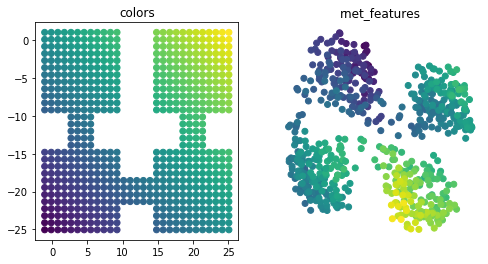

In [9]:
model.eval()
model.to("cpu")
fig = env.plot_embeddings(model, points['state'][:, :], points['state'][:, :],
                          show_colors=True)

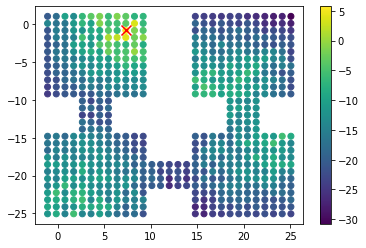

In [10]:
i = np.random.randint(0, points['state'][:, :3].shape[0])
fig = env.plot_values(model, points['state'][:, :3][i], points['state'][:, :3][i], points['state'][:, :3],
                      points['state'][:, :3])

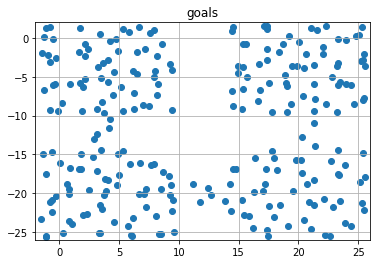

In [11]:
env.set_goals(memory.get_goals())
fig = env.plot_goals()

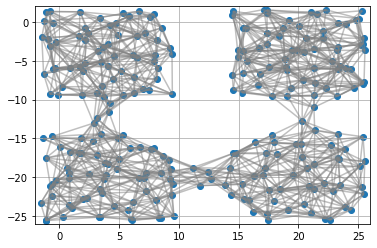

In [12]:
fig = env.plot_graph(memory)

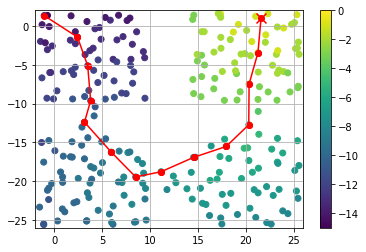

In [15]:
fig = env.plot_graph_dist(memory)

In [17]:
import yaml
from deepdiff import DeepDiff

exp_name1 = ''
exp_name2 = ''

yaml_file1 = get_yaml_file(exp_name1)
yaml_file2 = get_yaml_file(exp_name2)

def yaml_as_dict(my_file):
    my_dict = {}
    with open(my_file, 'r') as fp:
        docs = yaml.safe_load_all(fp)
        for doc in docs:
            for key, value in doc.items():
                my_dict[key] = value
    return my_dict

if __name__ == '__main__':
    a = yaml_as_dict(yaml_file1)
    b = yaml_as_dict(yaml_file2)
    ddiff = DeepDiff(a, b, ignore_order=True)
    print(ddiff)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
def get_yaml_file(exp_name):
    tmp_path = f"{logs_dir}/multirun/{exp_name}"
    return f"{tmp_path}/{os.listdir(tmp_path)[0]}/.hydra/config.yaml"